In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#path 
data = "/content/drive/MyDrive/Colab Notebooks/data mining/topic_detection_train.v1.0.txt"
savefile = "/content/drive/MyDrive/Colab Notebooks/data mining/topic_detection_train"
stopwordsfile = "/content/drive/MyDrive/Colab Notebooks/data mining/stopwords.txt"

cleandf = "/content/drive/MyDrive/Colab Notebooks/data mining/"

In [5]:
import pandas as pd
import tqdm
import re
import string
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#chạy quá trình đọc file text và chuẩn hóa từ
df = []
with open(data, "r", encoding="utf-8") as f:
        for line in f:        
            label = line.split(" ")[0]
            text = line.replace(label, "").replace("\n", "")
            df.append([label,text])

In [8]:
#tạo DataFrame
df = pd.DataFrame(df, columns=['label', 'text'])
df['len'] = df.text.apply(lambda x: len(x.split())) #chia câu thành một chuỗi từ

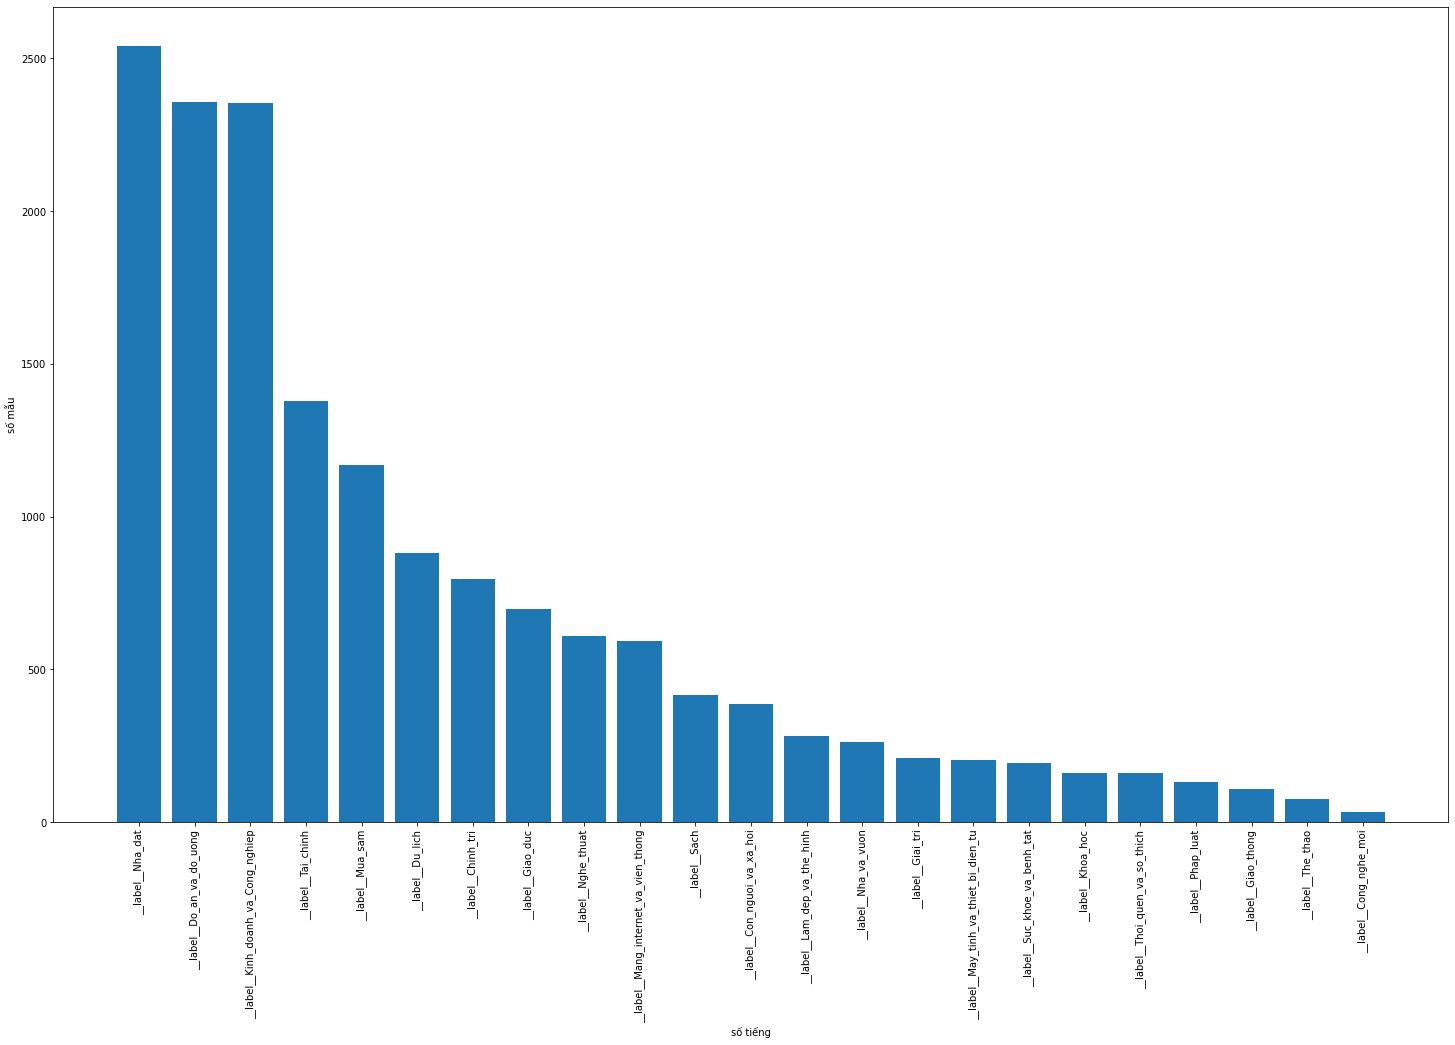

In [19]:
tmp = df
plt.figure(figsize=(25, 15))
plt.bar(tmp.label.value_counts().index, tmp.label.value_counts())
plt.xlabel("số tiếng")
plt.xticks(rotation=90)
plt.ylabel("số mẫu")
plt.show()

                len
count  16000.000000
mean     293.472812
std      388.830415
min        5.000000
25%       90.000000
50%      170.000000
75%      339.000000
max     7911.000000


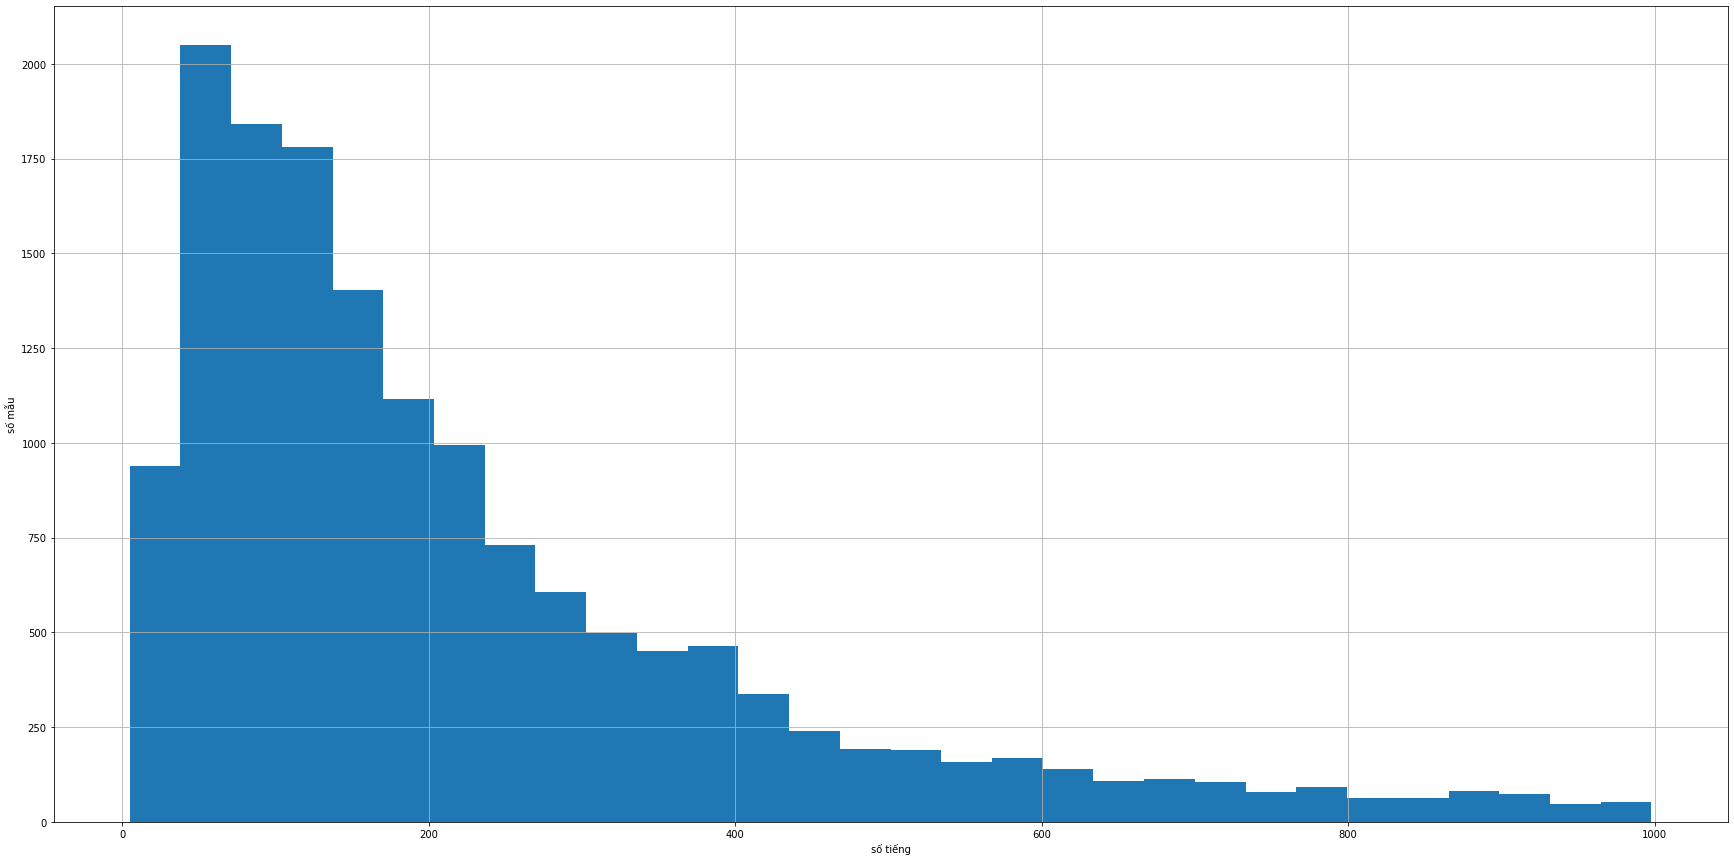

In [13]:


print(df.describe())
tmp = df[df.len < 1000]
plt.figure(figsize=(30, 15))
tmp.len.hist(bins=30)
plt.xlabel("số tiếng")
plt.ylabel("số mẫu")
plt.show()

In [10]:
#top cau ngan
df.sort_values('len').head(20)

,label,text,len
9308,__label__Do_an_va_do_uong,Thịt gà sốt chua ngọt,5
10883,__label__Giao_thong,Cần mua xe wave k giấy ạ,7
14759,__label__Giao_duc,VỀ KỲ THI THPT QUỐC GIA 2015,7
9573,__label__Do_an_va_do_uong,Công thức món ngon đậm đà. Đơn giản,8
14889,__label__Chinh_tri,"Bảo vệ Tổ quốc Việt Nam thân yêu,",8
15676,__label__Giao_duc,LƯU Ý VỀ KỲ THI THPT QUỐC GIA 2019!,9
12736,__label__Giao_duc,CẤU TRÚC ĐỀ THI THPT QUỐC GIA MÔN VĂN,9
13911,__label__Giao_duc,Thông tin về kỳ thi THPT Quốc gia 2019!,9
15776,__label__Chinh_tri,HẢI QUÂN NHÂN DÂN VIỆT NAM . ________ . -R-,10
12036,__label__Giao_thong,E muốn mua xe máy cũ 3tr đổ lại ạ,10


In [11]:
#top cau ngan
df.sort_values('len').tail(20)

,label,text,len
3906,__label__Giao_duc,"""HỌC SINH CÓ QUYỀN LỰA CHỌN THẦY CÔ ĐẶT VÀO T...",3578
4776,__label__Du_lich,❤️LỊCH TRÌNH THAILAND THAM KHẢO 6N5D ( PATTAY...,3646
12672,__label__Lam_dep_va_the_hinh,💣💣Phẫu Thuật NÂNG MÔNG Những Trái Bom Di Động...,3675
5033,__label__Chinh_tri,#QĐND/ TRƯỜNG SA - HOÀNG SA VÀ NHỮNG CHUYỆN C...,3830
9796,__label__Mua_sam,LINH KIỆN LAPTOP KIM THUỶ Yahoo : ktlaptop11 ...,3874
5324,__label__Giao_duc,THÔNG BÁO . . TUYỂN SINH ĐÀO TẠO TIẾN SĨ Ở...,3984
2971,__label__Lam_dep_va_the_hinh,🎇🎇🎇Một Số Cách Tăng Cường Sinh Lý Hiệu Quả Ch...,3986
7374,__label__Du_lich,"😍😍 30/4 NÀY ĐỪNG TỪ CHỐI TAIWAN NỮA, REVIEW Q...",4168
11366,__label__Chinh_tri,TRỞ THÀNH ĐẢNG VIÊN VÀ TIẾP TỤC NHỮNG NGÀY TH...,4397
7543,__label__Kinh_doanh_va_Cong_nghiep,"Toàn văn phát biểu của Tổng thống Mỹ Obama, t...",4512


In [21]:
#chiều dài dữ liệu
len(df)

16000

In [24]:
#kiểm tra trùng lặp dữ liệu
df[df.duplicated()]

,label,text,len
11920,__label__Tai_chinh,"Bị kiểm tra, thanh tra thuế, phải làm sao đây...",7143
